# Modelo de Regresión Lineal para Una Variable


In [88]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.metrics import mean_squared_error, r2_score
import statsmodels.api as sm
from scipy.stats import normaltest
from yellowbrick.regressor import ResidualsPlot

<small>

**Nota:** Se hará la separación de train y test (70/30) del CSV de _train_ debido a que el archivo de _test_ no contiene la variable _SalePrice_ para realizar las comparaciones.
</small>


#### Carga de archivos


In [89]:
train = pd.read_csv("train.csv") 
test = pd.read_csv("test.csv")  

#### Selección de variables


In [90]:
X_train = train[['OverallQual']]
y_train = train['SalePrice']

<small>

**Nota:** La selección de _OverallQual_ fue debido a que tiene la correlación más alta de las variables (0.79), con el precio _(SalePrice)_. Además de tener respaldo teórico y alta carga siendo del primer componente principal (PC1).
</small>


#### División traim (70%) y test (30%)


In [91]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, train_size=0.7, random_state=42)

#### Ajuste de modelo de regresión lineal


In [92]:
y_train_values = y_train.values  
y_test_values = y_test.values  
x_train_values = X_train['OverallQual'].values.reshape(-1,1)  
x_test_values = X_test['OverallQual'].values.reshape(-1,1)  

lm = LinearRegression()
lm.fit(x_train_values, y_train_values)

LinearRegression()

#### Predicción sobre el test set


In [93]:
p_length_pred = lm.predict(x_test_values)

#### Coeficientes (y = mx + c)


In [94]:
m = lm.coef_[0]
c = lm.intercept_
label = r'SalePrice = %0.4f * OverallQual + %0.4f' % (m, c)
print(label)

SalePrice = 44434.2064 * OverallQual + -90943.0198


#### Gráfico de dispersión sobre la recta de regresión


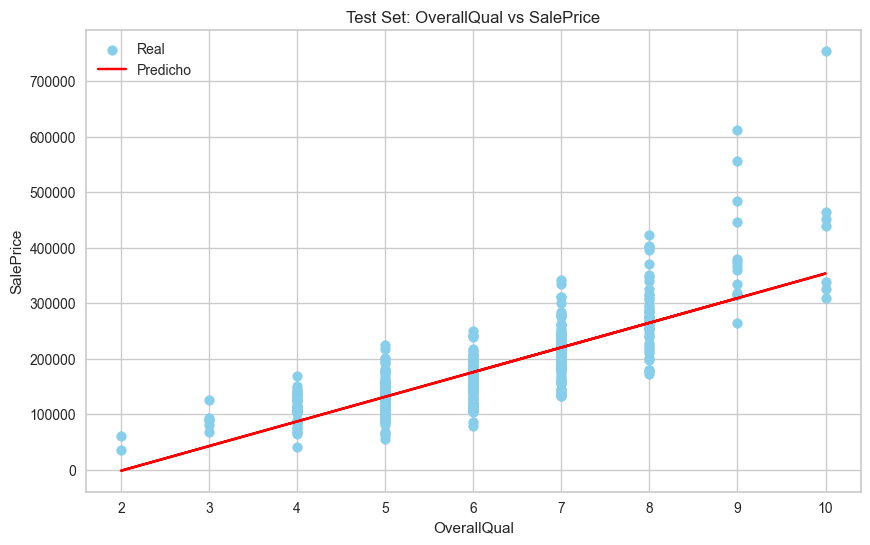

In [95]:
plt.figure(figsize=(10, 6))
plt.scatter(x_test_values, y_test_values, color='skyblue', label='Real')
plt.plot(x_test_values, p_length_pred, color="red", label='Predicho')
plt.xlabel("OverallQual")
plt.ylabel("SalePrice")
plt.title("Test Set: OverallQual vs SalePrice")
plt.legend()
plt.grid(True)
plt.show()

### Métricas de evaluación


In [96]:
print("Mean Squared Error: %.2f" % mean_squared_error(y_test_values, p_length_pred))
print("R squared: %.2f" % r2_score(y_test_values, p_length_pred))

Mean Squared Error: 2482894939.48
R squared: 0.64


### Calculo y muestra de residuales


In [97]:
residuales = y_test_values - p_length_pred

for i in range(len(y_test_values)):
    print(y_test_values[i], p_length_pred[i], " --> ", "\tDIFF:", residuales[i])


154500 175662.21857823114  -->  	DIFF: -21162.218578231143
325000 264530.6313724766  -->  	DIFF: 60469.36862752342
115000 131228.0121811085  -->  	DIFF: -16228.012181108497
159000 175662.21857823114  -->  	DIFF: -16662.218578231143
315500 308964.8377695993  -->  	DIFF: 6535.162230400718
75500 86793.8057839858  -->  	DIFF: -11293.805783985794
311500 220096.42497535385  -->  	DIFF: 91403.57502464615
146000 175662.21857823114  -->  	DIFF: -29662.218578231143
84500 86793.8057839858  -->  	DIFF: -2293.805783985794
135500 131228.0121811085  -->  	DIFF: 4271.987818891503
145000 220096.42497535385  -->  	DIFF: -75096.42497535385
130000 131228.0121811085  -->  	DIFF: -1228.0121811084973
81000 42359.59938686309  -->  	DIFF: 38640.40061313691
214000 220096.42497535385  -->  	DIFF: -6096.424975353846
181000 175662.21857823114  -->  	DIFF: 5337.781421768857
134500 131228.0121811085  -->  	DIFF: 3271.9878188915027
183500 220096.42497535385  -->  	DIFF: -36596.424975353846
135000 131228.0121811085  -

#### Diferencia máxima


In [98]:
differences = [abs(t - p) for t, p in zip(y_test_values, p_length_pred)]
max_index = differences.index(max(differences))
print(f"Máxima diferencia - Índice: {max_index}")
print(f"Valor real: {y_test_values[max_index]}")
print(f"Valor predicho: {p_length_pred[max_index]}")
print(f"Diferencia máxima: {differences[max_index]}")

Máxima diferencia - Índice: 139
Valor real: 755000
Valor predicho: 353399.044166722
Diferencia máxima: 401600.955833278


#### Visualización de residuales


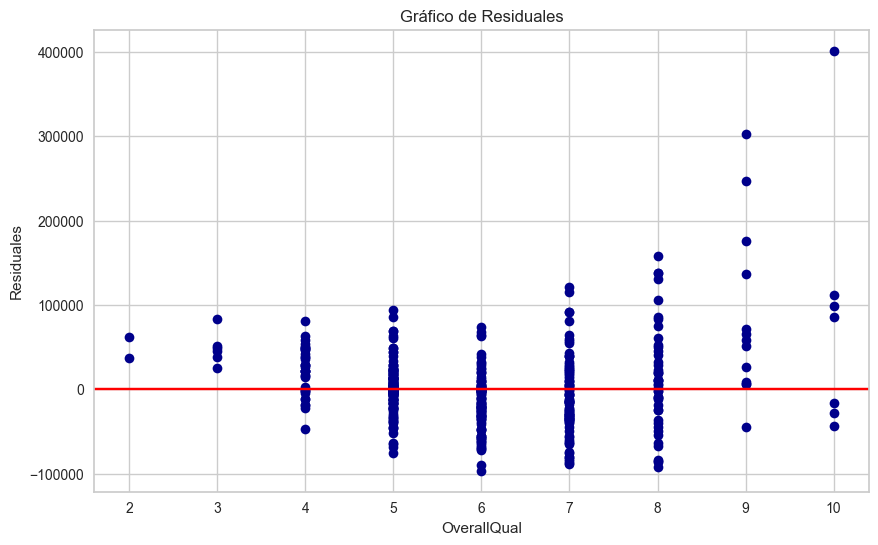

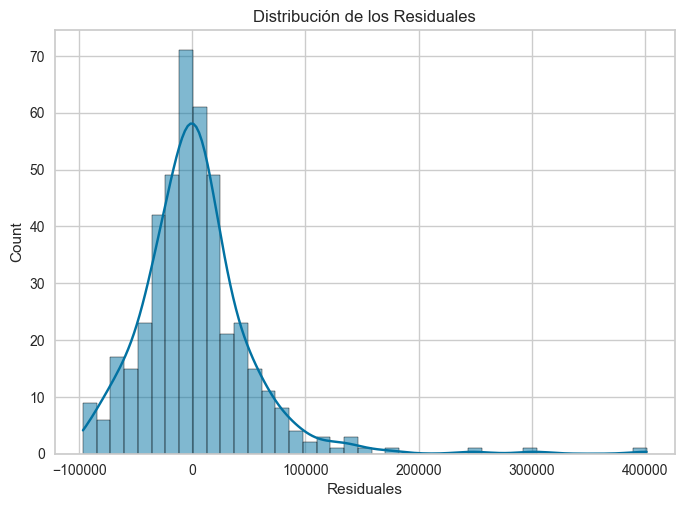

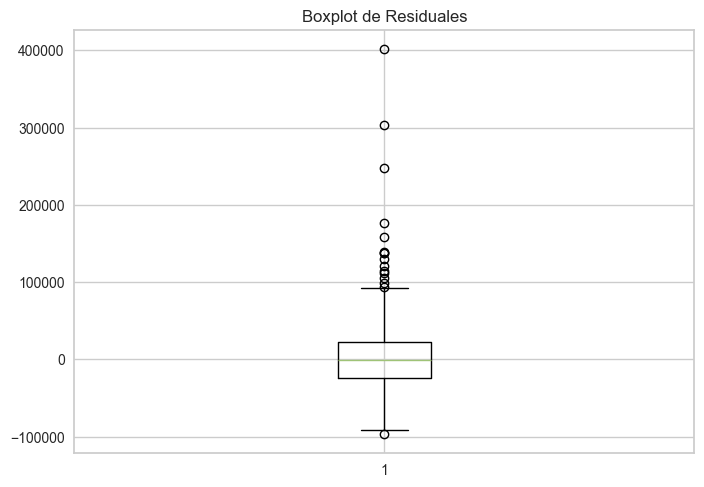

In [99]:
# Gráfico
plt.figure(figsize=(10, 6))
plt.plot(x_test_values, residuales, 'o', color='darkblue')
plt.axhline(0, color='red')
plt.title("Gráfico de Residuales")
plt.xlabel("OverallQual")
plt.ylabel("Residuales")
plt.grid(True)
plt.show()

# Histograma
sns.histplot(residuales, kde=True)
plt.xlabel("Residuales")
plt.title("Distribución de los Residuales")
plt.show()

# Boxplot 
plt.boxplot(residuales)
plt.title("Boxplot de Residuales")
plt.show()

#### Prueba de normalidad de residuos


In [100]:
normaltest(residuales)

NormaltestResult(statistic=np.float64(256.556173955224), pvalue=np.float64(1.9477565635891515e-56))

#### Yellowbrick de residuales


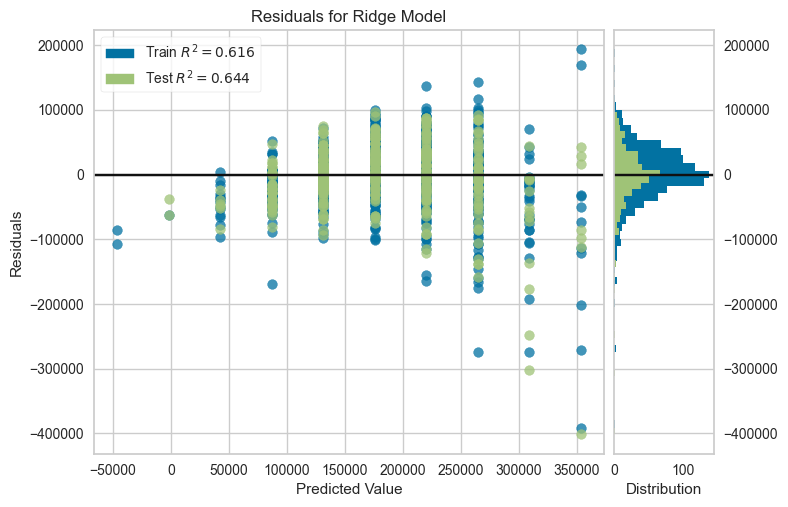

<Axes: title={'center': 'Residuals for Ridge Model'}, xlabel='Predicted Value', ylabel='Residuals'>

In [101]:
model = Ridge()
visualizer = ResidualsPlot(model)
visualizer.fit(x_train_values, y_train_values)  
visualizer.score(x_test_values, y_test_values)  
visualizer.show()

#### Analisis de coeficientes


In [102]:
est = sm.OLS(y_train_values, x_train_values)
est2 = est.fit()
print(est2.summary())

                                 OLS Regression Results                                
Dep. Variable:                      y   R-squared (uncentered):                   0.930
Model:                            OLS   Adj. R-squared (uncentered):              0.930
Method:                 Least Squares   F-statistic:                          1.364e+04
Date:                Sat, 01 Mar 2025   Prob (F-statistic):                        0.00
Time:                        15:33:10   Log-Likelihood:                         -12536.
No. Observations:                1021   AIC:                                  2.507e+04
Df Residuals:                    1020   BIC:                                  2.508e+04
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

#### Agregando intercepto


In [103]:
x_train_values = sm.add_constant(x_train_values)
est = sm.OLS(y_train_values, x_train_values)
est2 = est.fit()
print(est2.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.616
Model:                            OLS   Adj. R-squared:                  0.616
Method:                 Least Squares   F-statistic:                     1636.
Date:                Sat, 01 Mar 2025   Prob (F-statistic):          4.43e-214
Time:                        15:33:12   Log-Likelihood:                -12456.
No. Observations:                1021   AIC:                         2.492e+04
Df Residuals:                    1019   BIC:                         2.493e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -9.094e+04   6898.740    -13.183      0.0

#### Detección de overfitting


In [104]:
model = LinearRegression()
scores = cross_val_score(model, X_train, y_train, cv=5)  # 5 folds
print("Cross-validation scores:", scores)
print("Mean score:", scores.mean())

Cross-validation scores: [0.63180173 0.56288498 0.65941002 0.6008071  0.60554687]
Mean score: 0.6120901360019495


#### Análisis final de MRL Univariable


<small>

En este análisis se desarrolló un modelo de regresión lineal univariado (MRL) con el objetivo de predecir el precio de las casas _(SalePrice)_ utilizando como predictor únicamente la variable _OverallQual_, que representa la calidad general de la construcción. Esta variable fue seleccionada debido a que, según el análisis exploratorio inicial y análisis de componentes, es la que presenta la mayor correlación con el precio de las viviendas **(correlación = 0.79)**.

El dataset original fue dividido en un conjunto de entrenamiento (70%) y un conjunto de prueba (30%). El modelo fue entrenado utilizando el conjunto de entrenamiento y posteriormente evaluado en el conjunto de prueba.

La ecuación resultante de la regresión fue: SalePrice = 44434.2064 \* OverallQual + -90943.0198

### **Resultados**

**Métricas de desempeño**

Al evaluar el modelo sobre el conjunto de prueba, se obtuvieron las siguientes métricas:

a. Error Cuadrático Medio (MSE): 2,482,894,939.48

b. Coeficiente de Determinación (R²): 0.64

**Gráfica de dispersión: Predicción vs Real**

Análisis: La recta de regresión muestra una tendencia ascendente lógica (mayor calidad → mayor precio), sin embargo, la dispersión vertical es muy alta, lo que indica que hay mucha variabilidad que no es explicada por _OverallQual_.

**Gráfico de Residuales**

Análisis: El gráfico muestra un patrón de abanico, lo cual es una señal clara de **heterocedasticidad**. Esto significa que el modelo tiene un comportamiento más inexacto a medida que crece el precio, lo que suele ocurrir cuando el modelo es demasiado simple.

**Distribución de Residuales**

Análisis: Los residuos no siguen una distribución normal; presentan una cola larga hacia la derecha, lo que indica que hay varias casas cuyo precio real es mucho mayor al predicho. Esto es esperado en precios de casas, ya que el mercado tiene outliers (casas premium).

**Boxplot de Residuales**

Análisis: El boxplot confirma la existencia de outliers severos, lo cual es otra señal de que el modelo es incompleto.

**Residuales con Yellowbrick**

El R² obtenido en esta visualización es similar (0.64), lo cual confirma la consistencia de la evaluación. Sin embargo, el patrón de residuales sigue mostrando el mismo problema de heterocedasticidad.

### **Interpretación de resultados**

El desempeño del modelo es modesto _(R² = 0.64)_, y aunque **OverallQual** es una variable relevante, es insuficiente para capturar toda la complejidad que determina el precio de una casa.

El hecho de que los residuos presenten un patrón claro y que haya outliers muy marcados confirma que este modelo univariado es limitado y simplista, lo cual era esperable. Esto no es un error en el procedimiento, sino una evidencia directa de que el precio de las casas no puede explicarse adecuadamente con una sola variable.

**Nota:** En la siguiente sección se desarrollará un modelo de regresión lineal múltiple utilizando todas las variables numéricas disponibles, con el objetivo de mejorar el desempeño y evaluar la importancia relativa de cada característica.

</small>
